1/1 [==============================] - 0s 18ms/step - loss: 0.1811 - accuracy: 0.9355


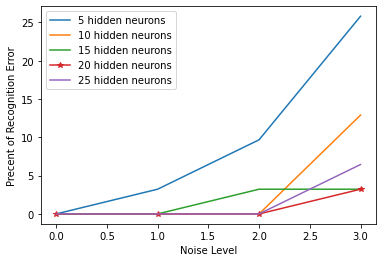

In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from helpers.Model import Model

from helpers.constants import NOISE_LEVEL_1, NOISE_LEVEL_2, NOISE_LEVEL_3, TARGET_PATTERNS

true_y = np.array(list(range(31)))

tests = [
    np.array(TARGET_PATTERNS['x']).reshape(-1, 7*5),    # Ideal Data (No Noise)
    np.array(NOISE_LEVEL_1['x']).reshape(-1, 7 * 5),    # Noise Level 1
    np.array(NOISE_LEVEL_2['x']).reshape(-1, 7 * 5),    # Noise Level 2
    np.array(NOISE_LEVEL_3['x']).reshape(-1, 7 * 5),    # Noise Level 3
]

save_dir = os.path.abspath('Saves/')

plot_data = {}
for neurons in range(5, 30, 5):
    model = Model(num_hidden_nodes=neurons)()
    model.load_weights(os.path.join(save_dir, f'{neurons}/final_weights.hdf5'))

    plot_data[neurons] = []

    for x in tests:
        loss, acc = model.evaluate(x, true_y)
        plot_data[neurons].append((1-acc) * 100)

    
plt.plot(plot_data[5], label=f"5 hidden neurons")
plt.plot(plot_data[10], label=f"10 hidden neurons")
plt.plot(plot_data[15], label=f"15 hidden neurons")
plt.plot(plot_data[20], label=f"20 hidden neurons", marker="*")
plt.plot(plot_data[25], label=f"25 hidden neurons")
plt.ylabel('Precent of Recognition Error')
plt.xlabel('Noise Level')
plt.legend()
plt.show()



Notably, the model with 20 hidden neurons has the optimal performance with 0% error rate for images with noise ranging from 0 to 2 pixels and a 3% error rate with images containing 3 pixels of noise.

In [2]:
plot_data[20]

[0.0, 0.0, 0.0, 3.225809335708618]